In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('dog_rates_tweets.csv', parse_dates=['created_at'])

In [3]:
#Extract data with some digit + /10
ratings = data['text'].str.extract(pat = r'(\d+(\.\d+)?)/10')

In [4]:
#Filter noise AKA NaNs
filt_ratings = ratings[ratings[0].notnull() == True]

In [5]:
#Change Dataframe to numeric value to filter <= 25
filt_ratings = pd.to_numeric(filt_ratings[0])
filt_ratings = filt_ratings[filt_ratings <= 25]

In [6]:
#Locate index values from filt_ratings and create col in single dataframe
filt_data = data.loc[filt_ratings.index]
filt_data['ratings'] = filt_ratings

In [7]:
def to_timestamp(x):
    return x.timestamp()

In [8]:
#apply timestamp function to data
filt_data['timestamp'] = filt_data['created_at'].apply(to_timestamp)
fit = stats.linregress(filt_data['timestamp'],filt_data['ratings'])

In [9]:
#Best fitline
filt_data['prediction'] = filt_data['timestamp']*fit.slope + fit.intercept

In [10]:
filt_data

,id,created_at,text,ratings,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\r\n(IG: libbyth...,14.0,1.525735e+09,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804
...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.507338
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.503856
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.498710
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.482540


In [11]:
fit.slope, fit.intercept

(3.515929974847721e-08, -40.46415480898916)

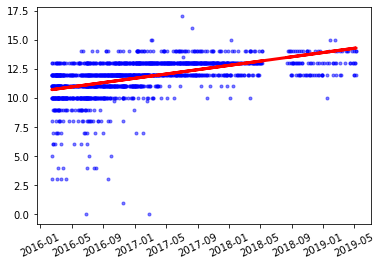

In [12]:
#Scatter plot
plt.xticks(rotation=25)
plt.plot(filt_data['created_at'], filt_data['ratings'], 'b.', alpha=0.5)
plt.plot(filt_data['created_at'], filt_data['prediction'], 'r-', linewidth=3)
plt.show()

In [15]:
print(fit.pvalue)

1.5139606492959894e-106


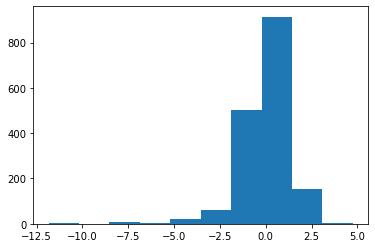

In [14]:
filt_data['residuals'] = filt_data['ratings'] - filt_data['prediction']
plt.hist(filt_data['residuals'])
plt.show()